In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



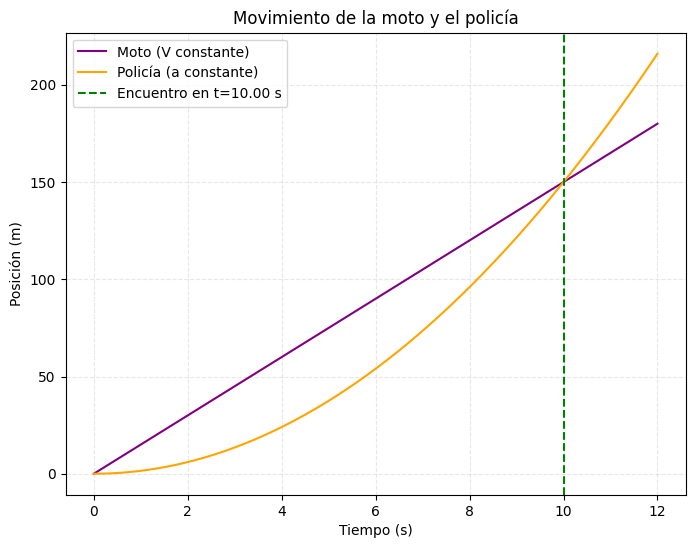

Se encuentran en t = 10.00 segundos.


In [ ]:
#Parametros: velocidad moto, aceleración policia

vm = 15 #velocidad cons de la moto (m/s)
ap = 3 #aceleración cons del policía (m/s^2)

#Ecuaciones: vm * t = (1/2) * ap * t^2
    #Resolviendo: 0 = (1/2) * ap * t^2 - vm * t
    #para t diferente de cero: t = (2 * vm) / ap
def encontrar_tiempo_encuentro(vm, ap):

    t_encuentro = (2 * vm) / ap
    return t_encuentro

def graficar_movimientos(vm, ap):
    t_encuentro = encontrar_tiempo_encuentro(vm, ap)
    t_max = t_encuentro + 2

    t = np.linspace(0, t_max, 500) #creamos arreglo del tiempo

    x_moto = vm * t #posición de la moto, la cual se describe mediante un mru
    x_policia = 0.5 * ap * t**2 #posición del policía, el cual se describe mediante mua

    plt.figure(figsize=(8, 6))
    plt.plot(t, x_moto, label='Moto (V constante)', color='purple')
    plt.plot(t, x_policia, label='Policía (a constante)', color='orange')
    plt.axvline(x=t_encuentro, color='green', linestyle='--', label=f'Encuentro en t={t_encuentro:.2f} s')
    plt.title('Movimiento de la moto y el policía')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición (m)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

    print(f'Se encuentran en t = {t_encuentro:.2f} segundos.')

graficar_movimientos(vm, ap)

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




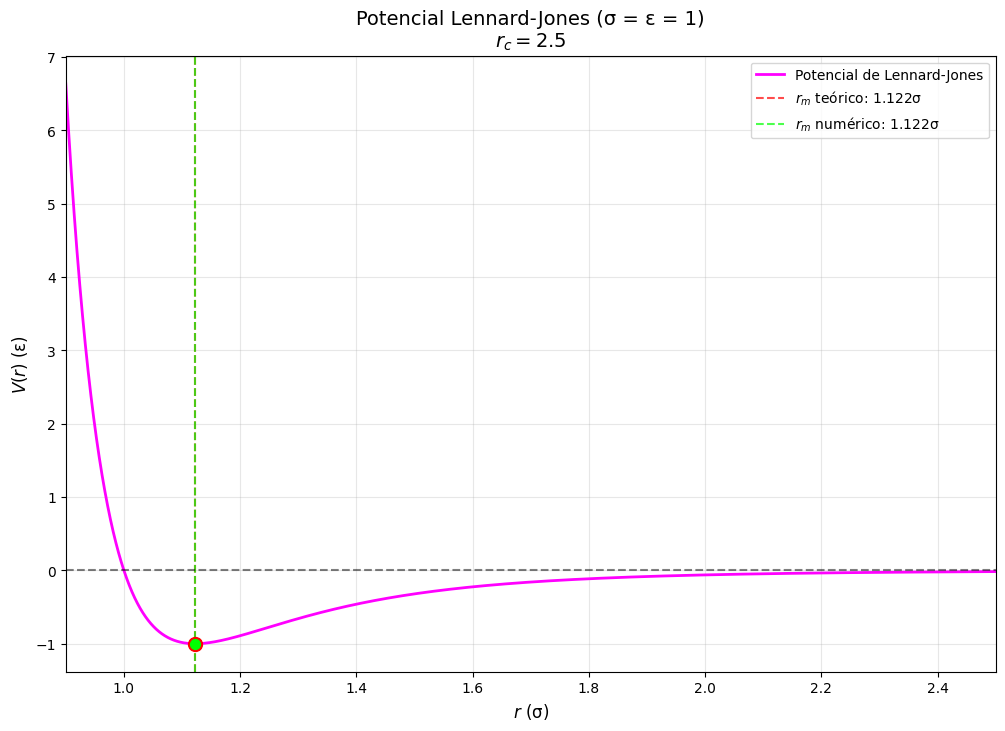

Verificación de r_m = 2^{1/6}σ:
σ = 0.5 | Teórico: 0.5612σ | Numérico: 0.5613σ
σ = 1.0 | Teórico: 1.1225σ | Numérico: 1.1226σ
σ = 1.5 | Teórico: 1.6837σ | Numérico: 1.6839σ
σ = 2.0 | Teórico: 2.2449σ | Numérico: 2.2452σ


In [ ]:
def potencial_lj(r, epsilon, sigma): #a): Función del potencial Lennard-Jones
    return 4 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

#Parámetros

sigma = 1.0 #b): Demostración gráfica con sigma = epsilon = 1
epsilon = 1.0
r_c = 2.5 * sigma
r = np.linspace(0.9*sigma, r_c, 10000) #generamos valores de r con una alta resolución cerca del mínimo teórico
V = potencial_lj(r, epsilon, sigma)

#Cálculos de rm (de manera directa)

rm_teorico = (2**(1/6)) * sigma
idx_min = np.argmin(V) #Índice del valor mínimo en el array
rm_numerico = r[idx_min]

#realizamos la creación del gráfico

plt.figure(figsize=(12, 8))
plt.plot(r, V, label='Potencial de Lennard-Jones', color='magenta', linewidth=2)

#las líneas verticales discontinuas para rm
plt.axvline(rm_teorico, color='red', linestyle='--', alpha=0.7,
           label=f'$r_m$ teórico: {rm_teorico:.3f}σ')
plt.axvline(rm_numerico, color='lime', linestyle='--', alpha=0.7,
           label=f'$r_m$ numérico: {rm_numerico:.3f}σ')

#Puntos de marcación
plt.scatter(rm_teorico, potencial_lj(rm_teorico, epsilon, sigma),
           color='red', s=100, zorder=5)
plt.scatter(rm_numerico, V[idx_min], color='lime', s=50, zorder=5)

#configuramos el gráfico, a preferencia
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title(f'Potencial Lennard-Jones (σ = ε = 1)\n$r_c = {r_c}$', fontsize=14)
plt.xlabel('$r$ (σ)', fontsize=12)
plt.ylabel('$V(r)$ (ε)', fontsize=12)
plt.xlim(0.9*sigma, r_c)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.show()

sigmas = [0.5, 1.0, 1.5, 2.0] #c): Verificación para diferentes valores de sigma
epsilon = 1.0

print("Verificación de r_m = 2^{1/6}σ:")
for s in sigmas:
    r_values = np.linspace(0.9*s, 2.5*s, 1000)
    V_values = potencial_lj(r_values, epsilon, s)
    idx_min = np.argmin(V_values)
    rm_numerico = r_values[idx_min]
    rm_teorico = (2**(1/6)) * s
    print(f'σ = {s:.1f} | Teórico: {rm_teorico:.4f}σ | Numérico: {rm_numerico:.4f}σ')

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


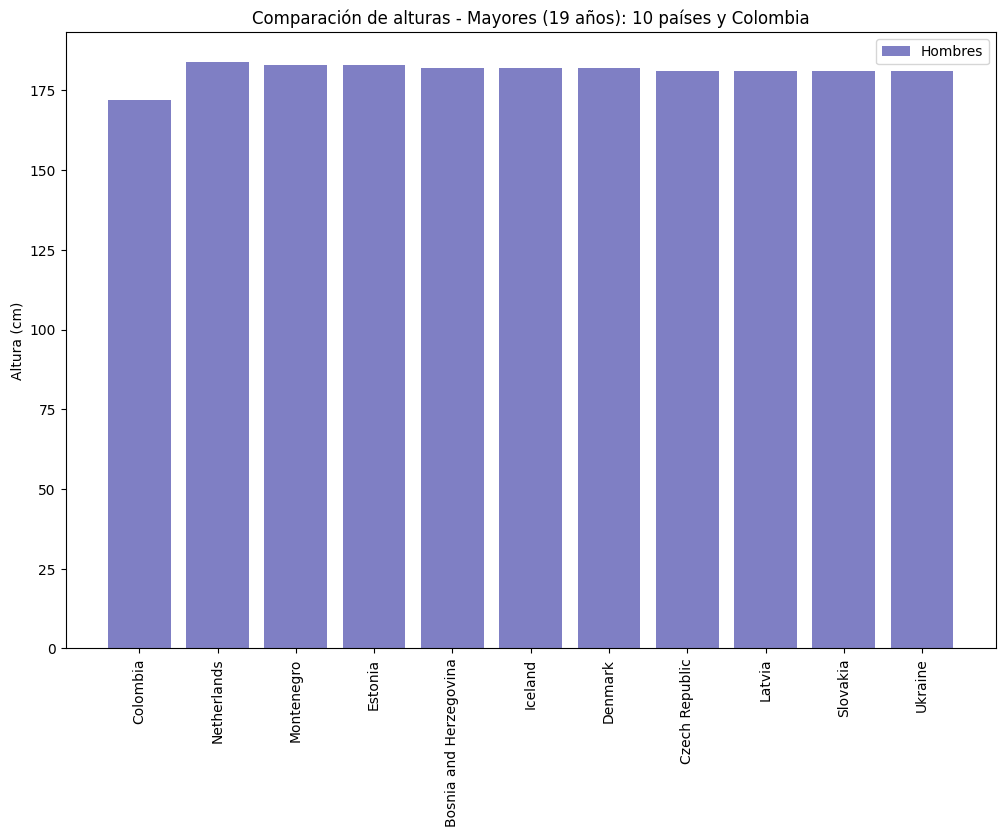

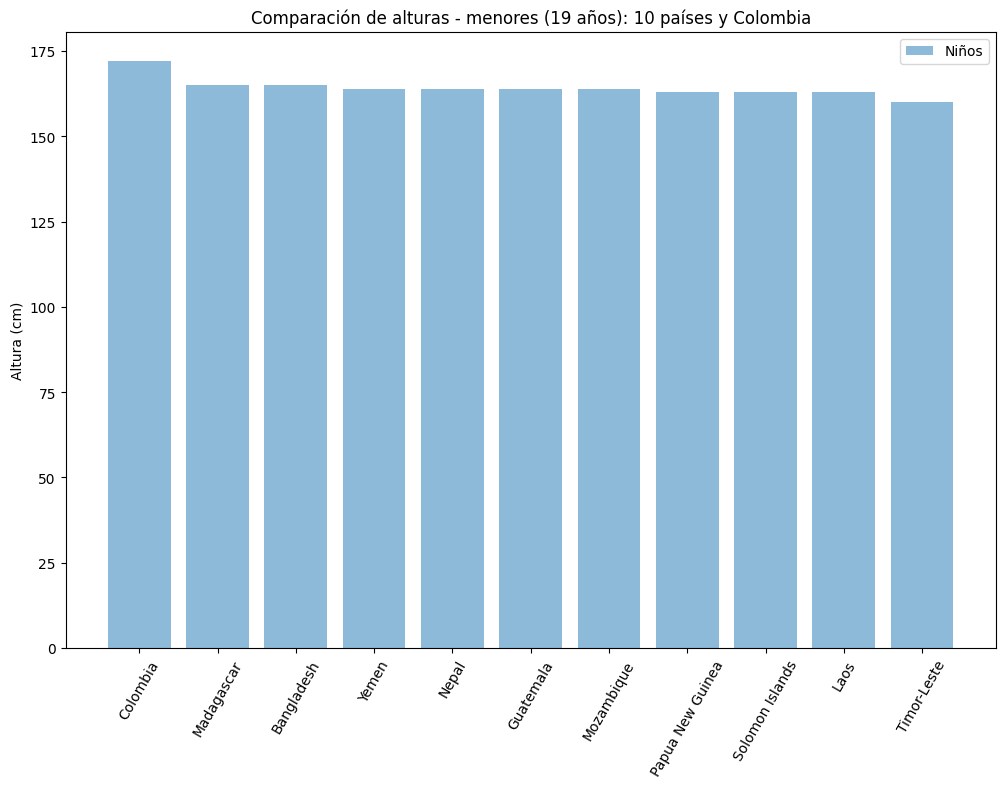

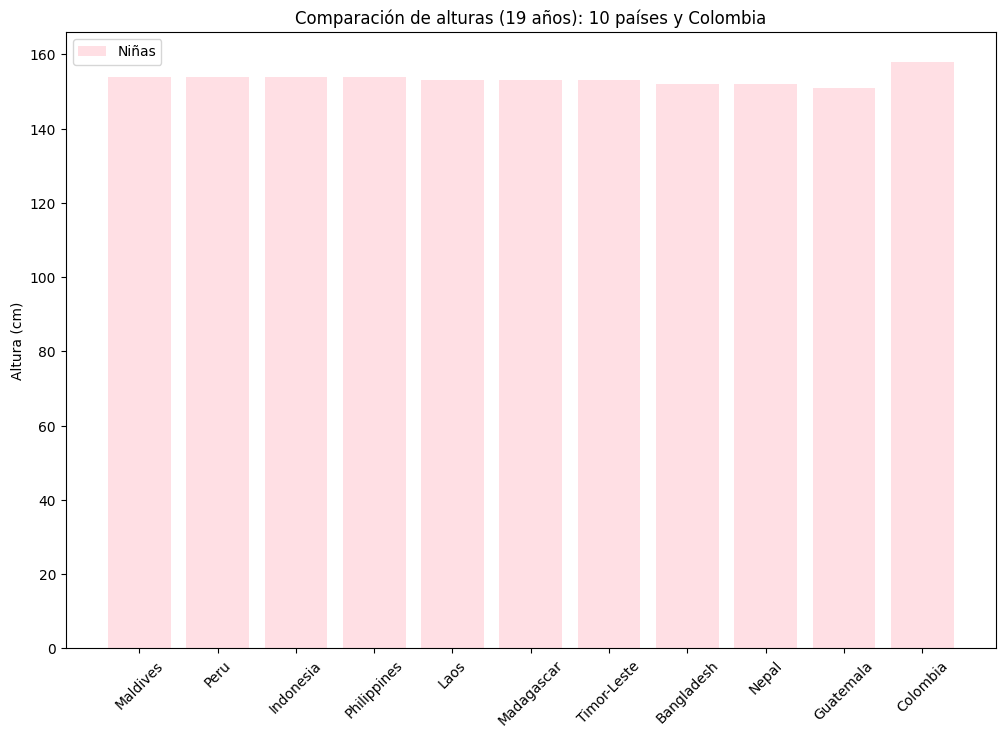

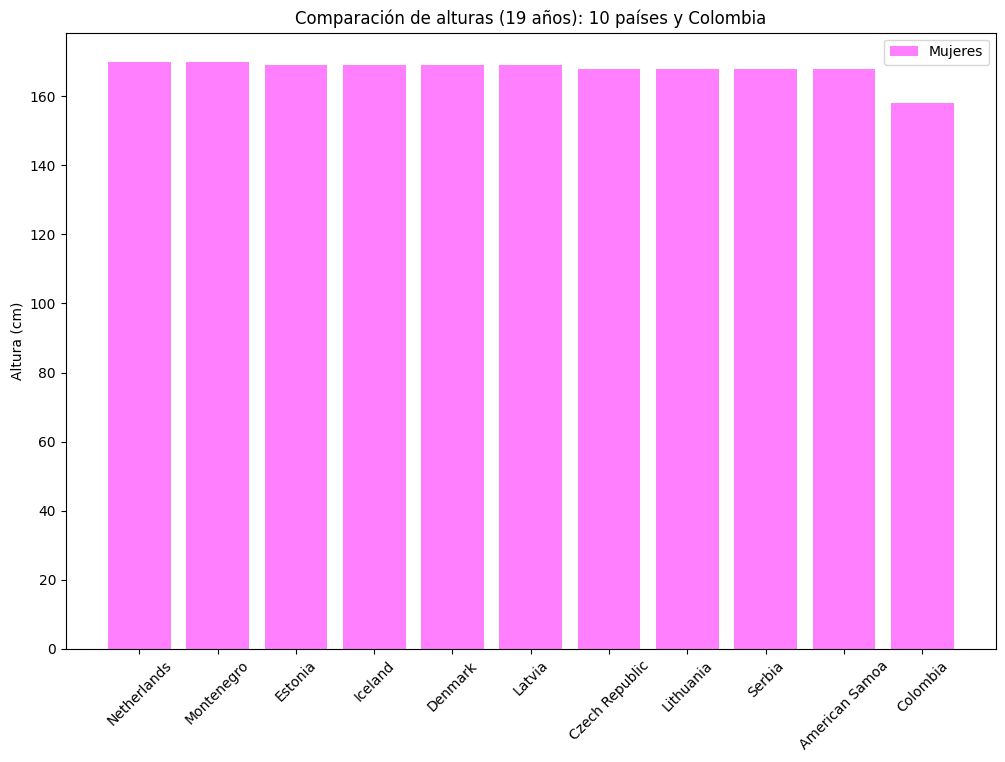

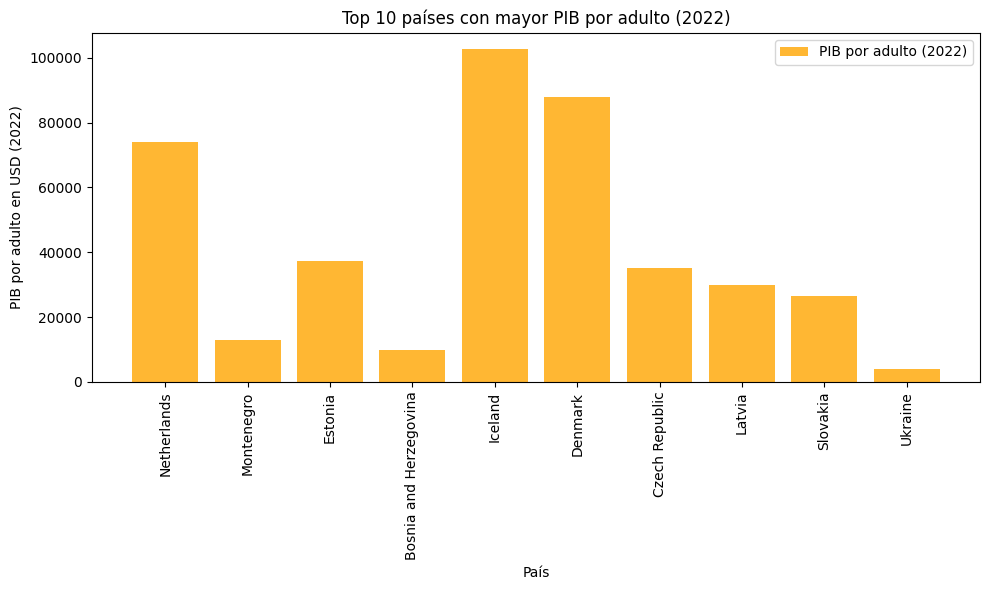

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

columnas_nuevas = []
for col in alturas:
    if "(in)" not in col:
        columnas_nuevas.append(col)

alturas = alturas[columnas_nuevas]  #columnas útiles

alt = alturas.rename(columns={"Country": "País", "Average Height, Boys, 19 yo (cm)↓": "Niños 19 años", "Girls 19 (cm)": "Niñas 19 años"}) #cambiamos nombre a las columnas

alt = alt.dropna(axis=1)
alt = alt.drop(alt.index[-1])
alt

menores_hombres = alt.tail(10)#fijamos de parametro los 10 mayores y los 10 menores
mayores_hombres = alt.head(10)

colombia = alt.loc[alturas["Country"] == "Colombia"] #se agrega Col

datos_grafico_hombres_mayores = pd.concat([colombia, mayores_hombres])#organizamos para los hombres mayores
plt.figure(figsize=(12, 8))
plt.bar(datos_grafico_hombres_mayores["País"], datos_grafico_hombres_mayores["Niños 19 años"], label="Hombres", color = 'darkblue', alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas - Mayores (19 años): 10 países y Colombia")
plt.legend()
plt.show()

datos_grafico_hombres_menores = pd.concat([ colombia, menores_hombres])#para los hombres menores
plt.figure(figsize=(12, 8))
plt.bar(datos_grafico_hombres_menores["País"], datos_grafico_hombres_menores["Niños 19 años"], label="Niños", alpha=0.5)

plt.xticks(rotation=60)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas - menores (19 años): 10 países y Colombia")
plt.legend()
plt.show()

mujeres = alt.sort_values(by='Niñas 19 años', ascending=False) #ahora procedemos con las mujeres
menores_mujeres = mujeres.tail(10)
mayores_mujeres = mujeres.head(10)
datos_grafico_mujeres_menores = pd.concat([menores_mujeres, colombia])
plt.figure(figsize=(12, 8))
plt.bar(datos_grafico_mujeres_menores["País"], datos_grafico_mujeres_menores["Niñas 19 años"], label="Niñas", color = 'pink', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas (19 años): 10 países y Colombia")
plt.legend()
plt.show()

datos_grafico_mujeres_mayores = pd.concat([mayores_mujeres, colombia])
plt.figure(figsize=(12, 8))
plt.bar(datos_grafico_mujeres_mayores["País"], datos_grafico_mujeres_mayores["Niñas 19 años"], label="Mujeres", color = 'Magenta', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel("Altura (cm)")
plt.title("Comparación de alturas (19 años): 10 países y Colombia")
plt.legend()
plt.show()
#c
ingresos = income.rename(columns = {'Country': 'País'}) #cambiamos el nombre de la columna en el segundo DataFrame

merged_df = pd.merge(alt, ingresos, on='País', how='inner')
merged_df['GDP per Adult 2022'] = merged_df['GDP per Adult 2022'].str.replace('$', '').str.replace(',', '') #se convierten los datos de la columna a float
merged_df['GDP per Adult 2022'] = merged_df['GDP per Adult 2022'].astype(float)
merged_df.head()

mayor_ingreso = merged_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(mayor_ingreso["País"], mayor_ingreso['GDP per Adult 2022'],
        label="PIB por adulto (2022)", color='orange', alpha=0.8)

plt.xlabel("País")
plt.ylabel("PIB por adulto en USD (2022)")
plt.title("Top 10 países con mayor PIB por adulto (2022)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

#la altura y la riqueza no tienen algun tipo de relación directa